In [7]:
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import os

In [2]:
api = KaggleApi()
api.authenticate()

In [3]:
for file in ['train.tsv', 'test.tsv']:
    api.competition_download_file('sentiment-analysis-on-movie-reviews', f'{file}.zip', path='./')

    with zipfile.ZipFile(f'{file}.zip', 'r') as zip_ref:
        zip_ref.extractall('./')

    os.remove(f'{file}.zip')

100%|██████████| 1.28M/1.28M [00:00<00:00, 1.82MB/s]


100%|██████████| 494k/494k [00:00<00:00, 748kB/s]

In [1]:
import pandas as pd
import numpy as np
import yaml
import os
from typing import Text
import argparse
import matplotlib.pyplot as plt
from transformers import BertTokenizer
import seaborn as sns

/Users/zulikahlatief/Desktop/personal/NLP/nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   PhraseId  SentenceId                                             Phrase   
0         1           1  A series of escapades demonstrating the adage ...  \
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  
Training data loaded!


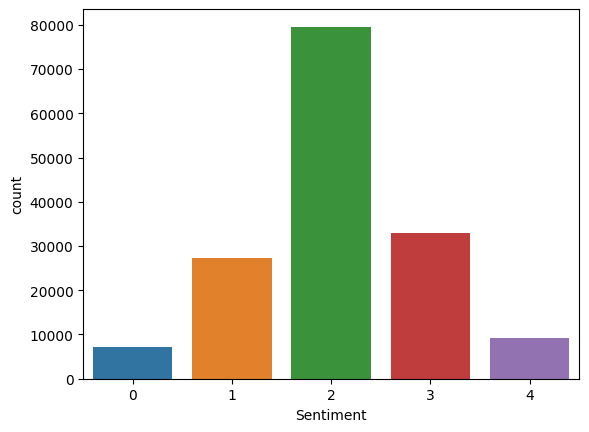

Shape of tensor:  156060 512


In [8]:
df = pd.read_csv('/Users/zulikahlatief/Desktop/personal/NLP/Project1: Sentimental analysis/data/train.tsv',  sep='\t')
print(df.head())
# Save raw data
print('Training data loaded!')
fig = plt.figure()
sns.countplot(x="Sentiment", data=df)
plt.show()

#define format for tokenization
seq_len = 512
num_samples = len(df)
print('Shape of tensor: ', num_samples, seq_len)

# initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [9]:

# tokenize - this time returning Numpy tensors
print('Tokenizing begin...')
tokens = tokenizer(df['Phrase'].tolist(), max_length=seq_len, truncation=True,
                padding='max_length', add_special_tokens=True,
                return_tensors='np')

Tokenizing begin...


In [10]:
print(tokens.keys())
print(tokens['input_ids'][:10])

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
[[  101   138  1326 ...     0     0     0]
 [  101   138  1326 ...     0     0     0]
 [  101   138  1326 ...     0     0     0]
 ...
 [  101 13936 25265 ...     0     0     0]
 [  101 13936 25265 ...     0     0     0]
 [  101 15107  1103 ...     0     0     0]]
